# Conjugate gradients method

## Hestenes Stiefel method

Derivative Based Methods are a class of iterative optimization methods that calculate a descent direction using gradient and/or hessian of the objective function.

Hestenes-Stiefel method suggested by M. R. Hestenes and E. Stiefel in 1953.

Let $d_0 = −\nabla f(x0)$

And $d_n = \frac{\nabla f(x_n)^T (\nabla f(x_n) - \nabla f(x_{n-1}))}{(\nabla f(x_n) - \nabla f(x_{n-1}))^T d_{n-1}} d_{n-1} - \nabla f(x_n)$

## Tasks

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import time

from optimizer import gradient_descent, hestenes_stiefel

In [2]:
def get_random_point(n, r, x0):
    point = np.zeros(n)
    
    thetas = []
    for i in range(n - 1):
        thetas.append(random.random() * 2 * math.pi)
        
    point[0] = r * np.cos(thetas[0])
    point[1] = r * np.sin(thetas[0])
    
    for i in range(1, n - 1):
        point[0] *= np.sin(thetas[i])
        point[1] *= np.sin(thetas[i])
    
    for i in range(2, n):
        point[i] = r * np.cos(thetas[i - 1])
        
        for j in range(i, n - 1):
            point[i] *= np.sin(thetas[i - 1])
            
    return point + x0

### First task

Calculation of the minimum of a strongly convex function:

$f(x) = \frac{L - \mu}{8} [x_1^2 + \sum_{i = 2}^n (x_i - x_{i+1})^2 - 2x_1] + \frac{\mu}{2}\lVert x \rVert_2^2$

Let $L = 100$, $\mu = 0.1$

In [3]:
def first_function(n):
    L = 100
    mu = 0.1
    
    A0 = 2 * np.identity(n)
    A0[n - 1][n - 1] -= 1

    rows, cols = np.indices(A0.shape)
    A0[rows == cols - 1] = -1
    A0[rows == cols + 1] = -1
    
    A = (L - mu) / 8 * A0 + mu / 2 * np.identity(n)

    b0 = np.zeros(n)
    b0[0] = -2

    b = b0.T * (L - mu) / 8
    
    return {
            'f': lambda x: x @ A @ x.T + x @ b,
            'grad': lambda x: 2 * A @ x.T + b.T
           }

Just works...

In [4]:
print(gradient_descent(first_function(2)['f'], first_function(2)['grad'], 2, np.zeros(2), 0.00001, 0.00000001, 40, "cauchy")['point'])
print(hestenes_stiefel(first_function(2)['f'], first_function(2)['grad'], 2, np.zeros(2), 0.00001, 0.00000001, 40, "cauchy")['point'])

[0.99161785 0.9872062 ]
[0.99207248 0.98811721]


<font size="4">Зависимость времени решения от размерности задачи</font>

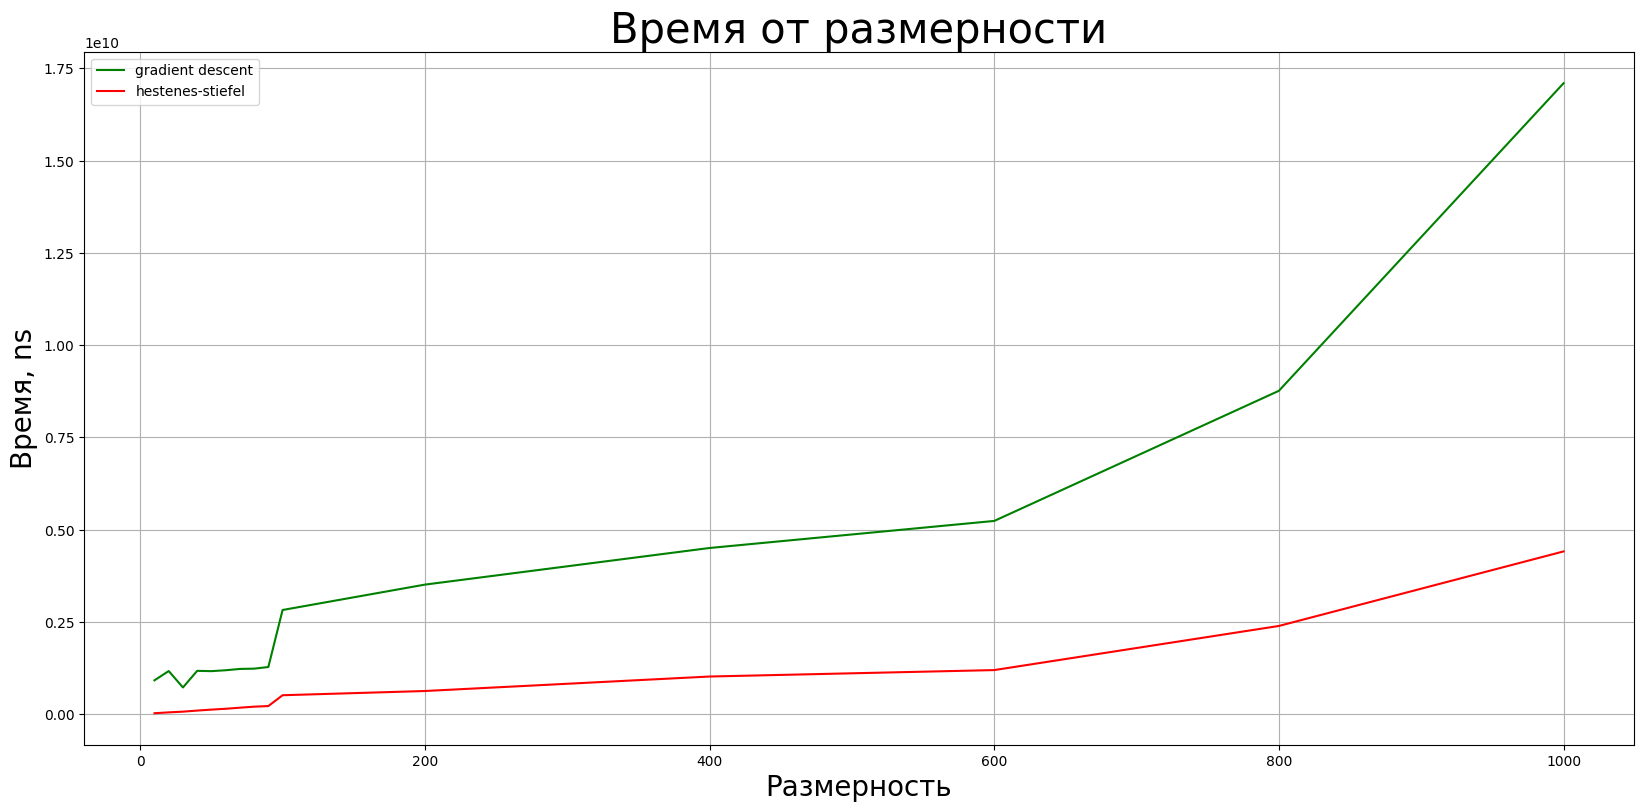

In [6]:
delay_grad = []
delay_hs = []
dimensions = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 400, 600, 800, 1000]
r = 10

for n in dimensions:
    f = first_function(n)
    x0 = get_random_point(n, r, np.ones(n))
    
    start = time.time_ns()
    result = gradient_descent(f['f'], f['grad'], n, x0, 0.00001, 0.00000001, 500, "cauchy")
    end = time.time_ns()
    delay_grad.append(end - start)
    
    start = time.time_ns()
    result = hestenes_stiefel(f['f'], f['grad'], n, x0, 0.00001, 0.00000001, 500, "cauchy")
    end = time.time_ns()
    delay_hs.append(end - start)
    
plt.figure(figsize=(20,9))
plt.title("Время от размерности", fontsize=30)
plt.plot(dimensions, delay_grad, c='green')
plt.plot(dimensions, delay_hs, c='red')
plt.xlabel("Размерность", fontsize=20)
plt.ylabel("Время, ns", fontsize=20)
plt.legend(["gradient descent", "hestenes-stiefel"])
plt.grid()
plt.show()

<font size="4">Зависимость времени решения от требуемой точности</font>

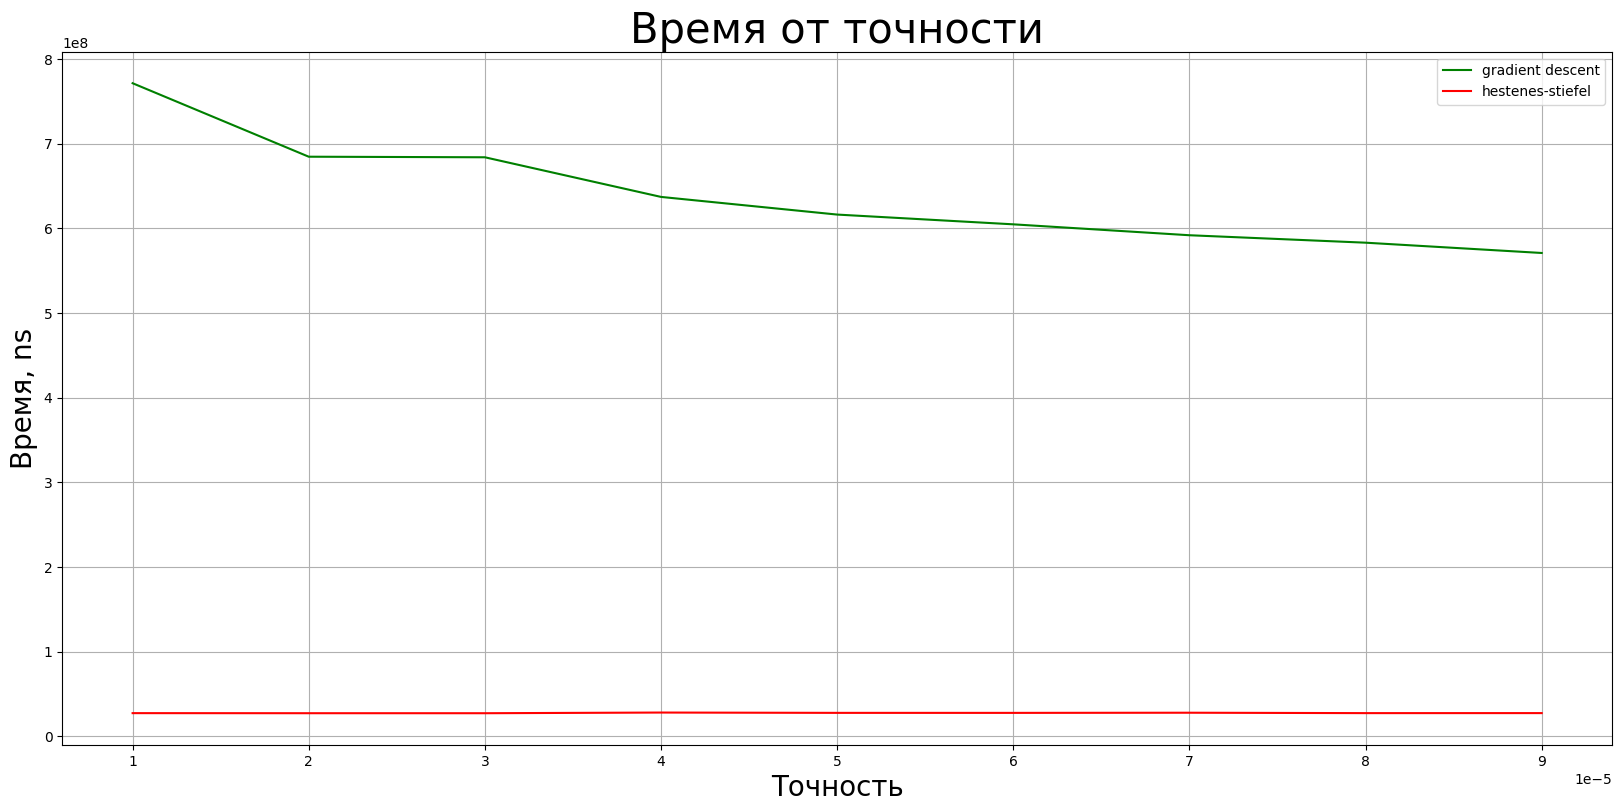

In [8]:
delay_grad = []
delay_hs = []
tolerance = np.arange(0.00001, 0.0001, 0.00001)

n = 10
r = 10
f = first_function(n)
x0 = get_random_point(n, r, np.ones(n))

for tol in tolerance:
    start = time.time_ns()
    result = gradient_descent(f['f'], f['grad'], n, x0, tol, 0.00000001, 500, "cauchy")
    end = time.time_ns()
    delay_grad.append(end - start)
    
    start = time.time_ns()
    result = hestenes_stiefel(f['f'], f['grad'], n, x0, tol, 0.00000001, 500, "cauchy")
    end = time.time_ns()
    delay_hs.append(end - start)
    
plt.figure(figsize=(20,9))
plt.title("Время от точности", fontsize=30)
plt.plot(tolerance, delay_grad, c='green')
plt.plot(tolerance, delay_hs, c='red')
plt.xlabel("Точность", fontsize=20)
plt.ylabel("Время, ns", fontsize=20)
plt.legend(["gradient descent", "hestenes-stiefel"])
plt.grid()
plt.show()

<font size="4">Зависимость времени решения от точности одномерного поиска</font>

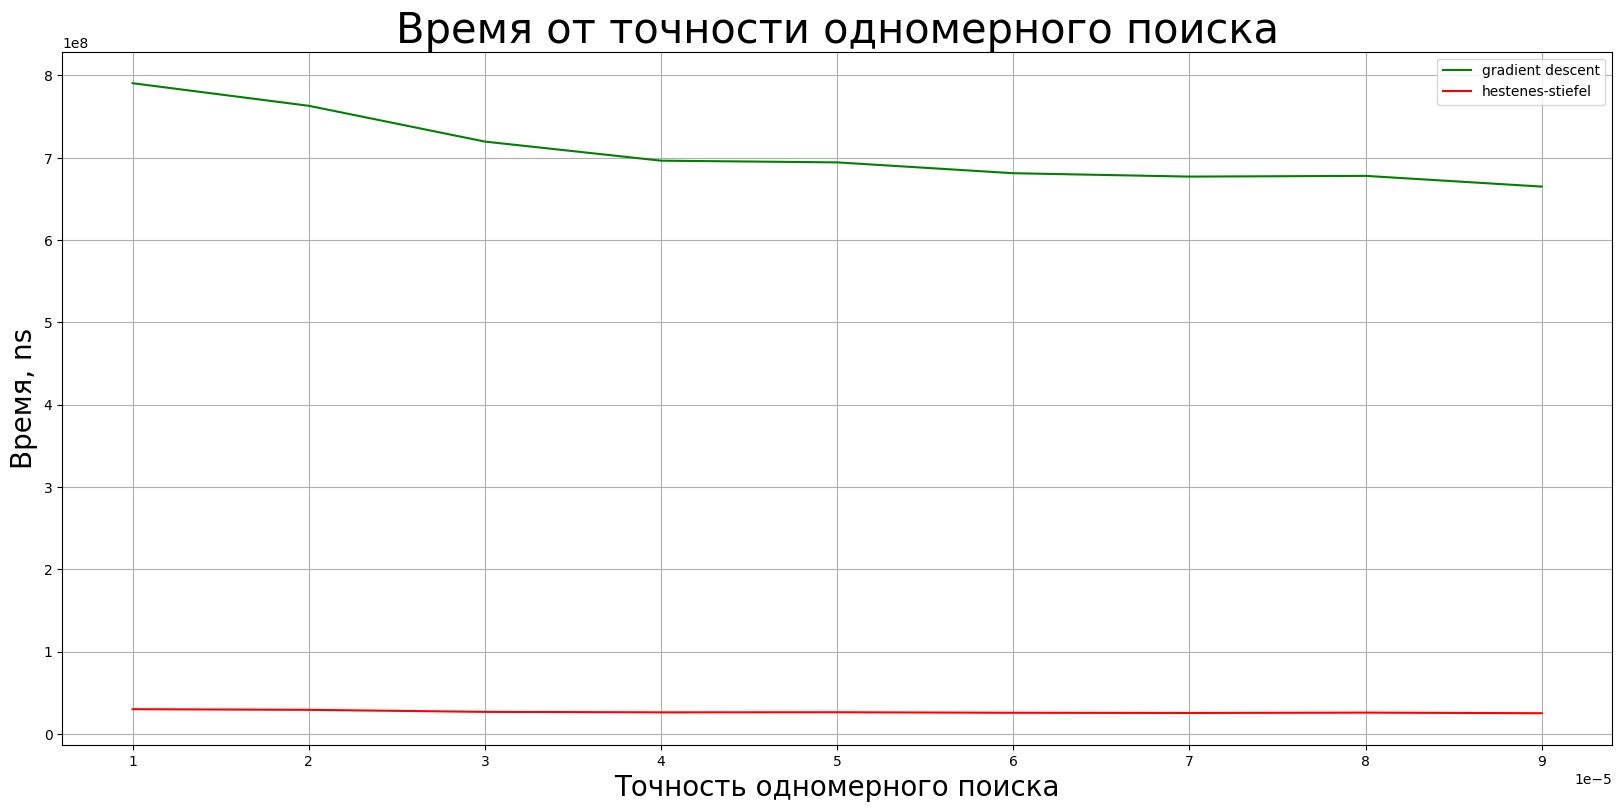

In [9]:
delay_grad = []
delay_hs = []
one_dim_tolerance = np.arange(0.00000001, 0.0000001, 0.00000001)

n = 10
r = 10
f = first_function(n)
x0 = get_random_point(n, r, np.ones(n))

for one_dim_tol in one_dim_tolerance:
    start = time.time_ns()
    result = gradient_descent(f['f'], f['grad'], n, x0, 0.00001, one_dim_tol, 500, "cauchy")
    end = time.time_ns()
    delay_grad.append(end - start)
    
    start = time.time_ns()
    result = hestenes_stiefel(f['f'], f['grad'], n, x0, 0.00001, one_dim_tol, 500, "cauchy")
    end = time.time_ns()
    delay_hs.append(end - start)
    
plt.figure(figsize=(20,9))
plt.title("Время от точности одномерного поиска", fontsize=30)
plt.plot(tolerance, delay_grad, c='green')
plt.plot(tolerance, delay_hs, c='red')
plt.xlabel("Точность одномерного поиска", fontsize=20)
plt.ylabel("Время, ns", fontsize=20)
plt.legend(["gradient descent", "hestenes-stiefel"])
plt.grid()
plt.show()

<font size="4">Зависимость времени решения от расстояния между оптимальной и начальной точками</font>

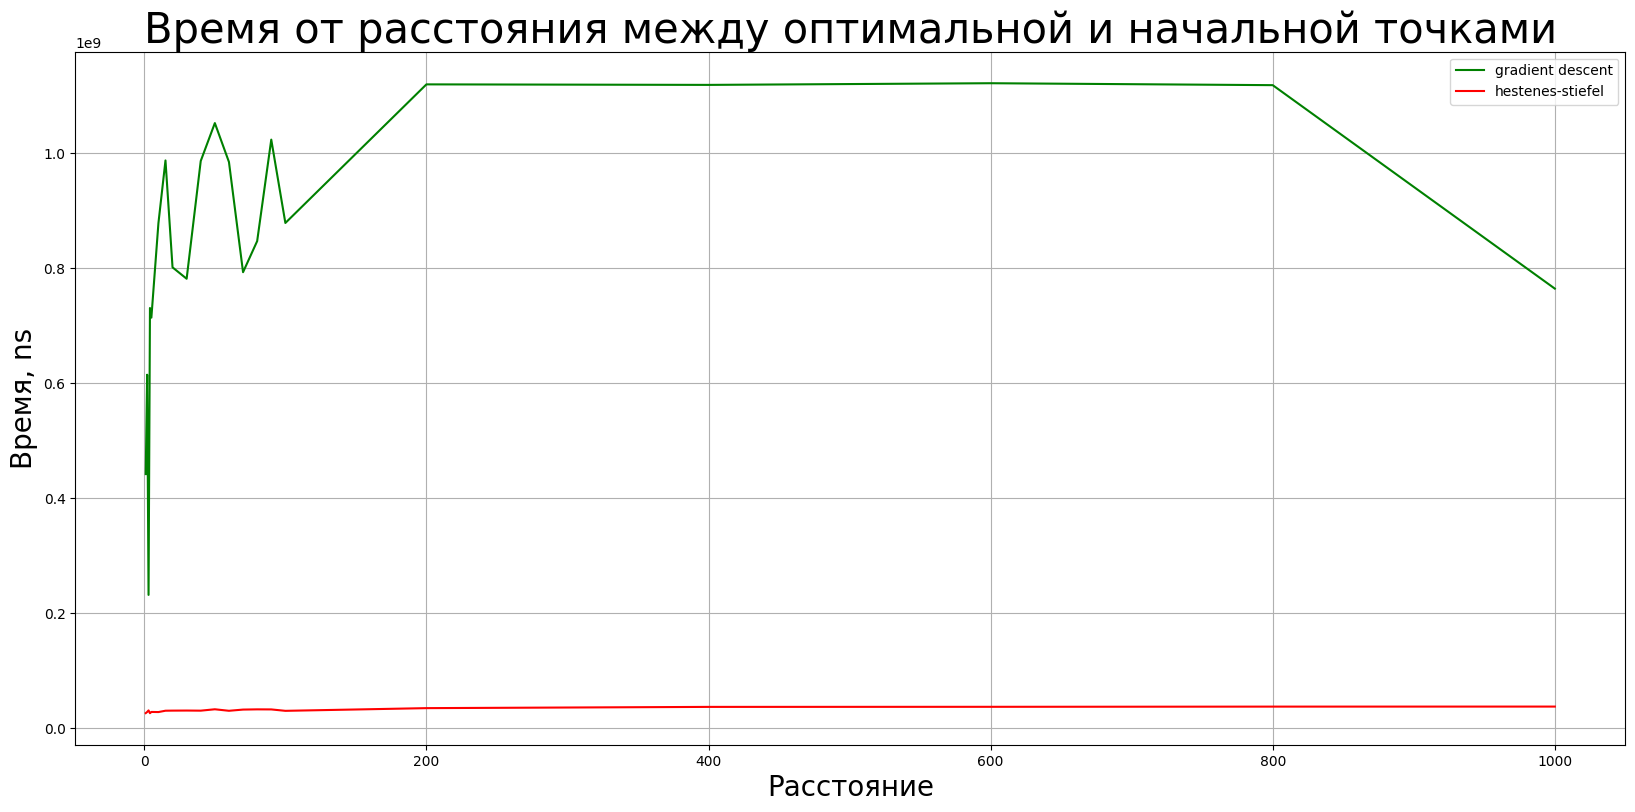

In [10]:
delay_grad = []
delay_hs = []
dists = [1, 2, 3, 4, 5, 10, 15, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 400, 600, 800, 1000]

n = 10
f = first_function(n)

for r in dists:
    x0 = get_random_point(n, r, np.ones(n))
    
    start = time.time_ns()
    result = gradient_descent(f['f'], f['grad'], n, x0, 0.00001, 0.00000001, 500, "cauchy")
    end = time.time_ns()
    delay_grad.append(end - start)
    
    start = time.time_ns()
    result = hestenes_stiefel(f['f'], f['grad'], n, x0, 0.00001, 0.00000001, 500, "cauchy")
    end = time.time_ns()
    delay_hs.append(end - start)
    
plt.figure(figsize=(20,9))
plt.title("Время от расстояния между оптимальной и начальной точками", fontsize=30)
plt.plot(dists, delay_grad, c='green')
plt.plot(dists, delay_hs, c='red')
plt.xlabel("Расстояние", fontsize=20)
plt.ylabel("Время, ns", fontsize=20)
plt.legend(["gradient descent", "hestenes-stiefel"])
plt.grid()
plt.show()

### Second task

Calculation of the dual problem to the problem of calculating the correspondence matrix:

$f(x, y) = -(L, x) - (W, y) + \ln[\sum_{i, j} exp(-\alpha c_{i,j} + x_i + y_j)]$

Here $x = R^n, y = R^n, L, W \in R_{+}^n, \lVert L \rVert_1 = 1, \lVert W \rVert_1 = 1, \alpha >= 1, c_{i,j} \in [0, 1]$.

$L, W$ are random, $\alpha = 100$

In [11]:
def second_function(n):
    L = np.random.random(n)
    L = L / np.sum(np.abs(L))
    
    W = np.random.random(n)
    W = W / np.sum(np.abs(W))
    
    alpha = 100
    
    c = np.random.random((n, n))
    
    def f(x):
        nonlocal n, L, W, alpha, c
        
        s = 0
        for i in range(n):
            for j in range(n):
                s += np.exp(-alpha * c[i][j] + x[i] + x[n + j])
                
        return -L @ x[:n].T - W @ x[n:].T + np.log(s)
    
    def grad(x):
        nonlocal n, L, W, alpha, c
        
        answer = np.zeros(2 * n)
        
        for i in range(n):
            answer[i] = -L[i]
        for i in range(n):
            answer[n + i] = -W[i]
            
        s = 0
        for i in range(n):
            for j in range(n):
                s += np.exp(-alpha * c[i][j] + x[i] + x[n + j])
        
        for i in range(n):
            si = 0
            for j in range(n):
                si += np.exp(-alpha * c[i][j] + x[i] + x[n + j])
                
            answer[i] += si / s
            
        for j in range(n):
            sj = 0
            for i in range(n):
                sj += np.exp(-alpha * c[i][j] + x[i] + x[n + j])
                
            answer[n + j] += sj / s
            
        return answer.T
    
    return {
            'f': f,
            'grad': grad
           }

Just works...

In [12]:
f = second_function(2)
print(gradient_descent(f['f'], f['grad'], 2, np.zeros(4), 0.00001, 0.00000001, 40, "cauchy")['point'])
print(hestenes_stiefel(f['f'], f['grad'], 2, np.zeros(4), 0.00001, 0.00000001, 40, "cauchy")['point'])

[  1.91601004  -1.91601004 -17.0803128   17.0803128 ]
[  1.81551012  -1.81551012 -17.18105986  17.18105986]


<font size="4">Зависимость времени решения от размерности задачи</font>

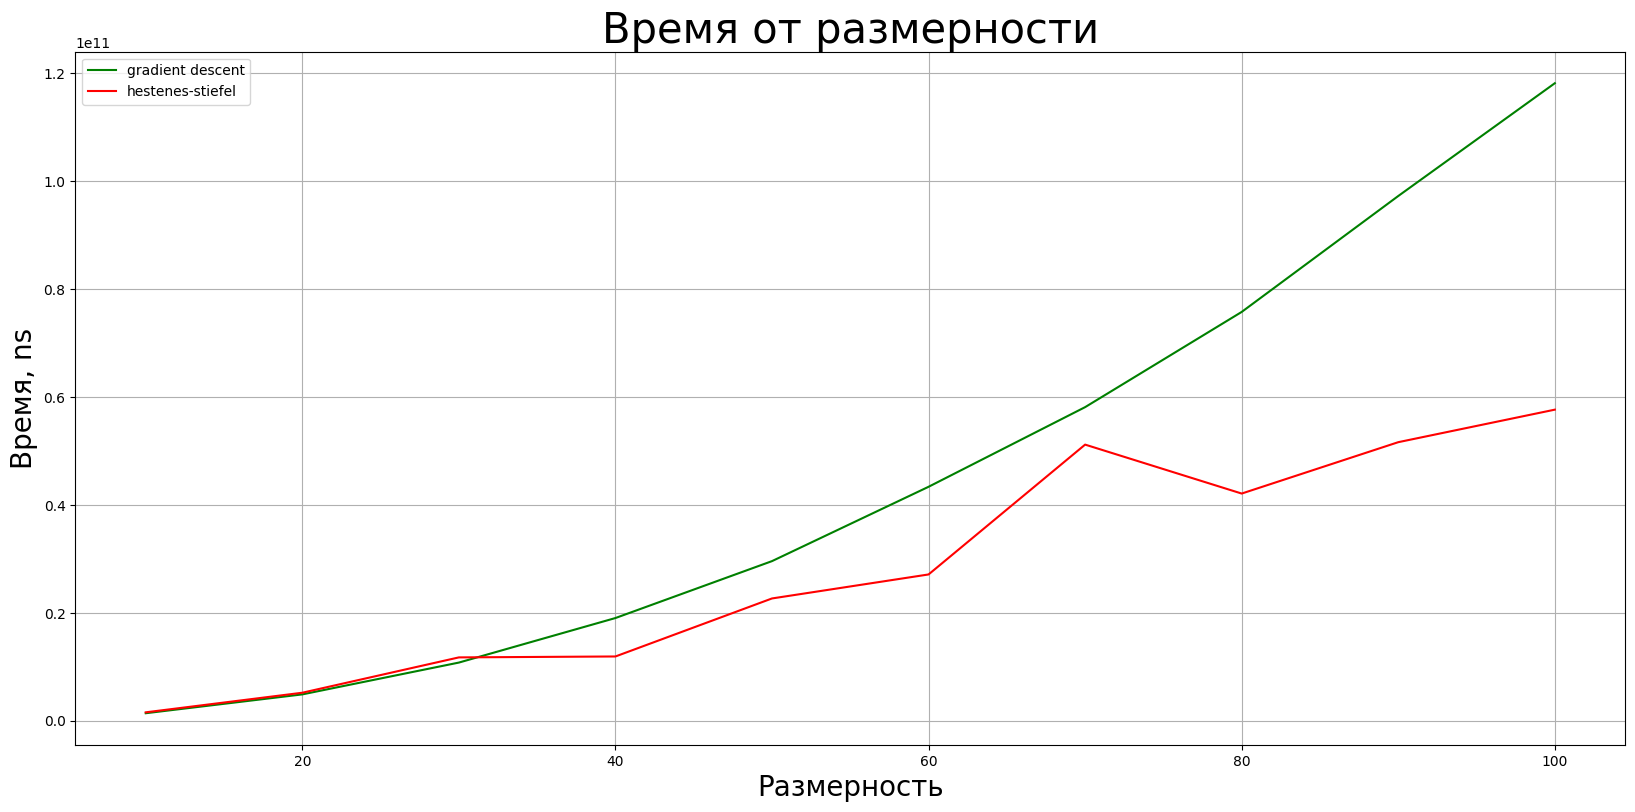

In [14]:
delay_grad = []
delay_hs = []
dimensions = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]#, 200, 400, 600, 800, 1000]
r = 10

for n in dimensions:
    f = second_function(n)
    x0 = get_random_point(2 * n, r, np.ones(2 * n))
    
    start = time.time_ns()
    result = gradient_descent(f['f'], f['grad'], 2 * n, x0, 0.0001, 0.0000001, 50, "cauchy")
    end = time.time_ns()
    delay_grad.append(end - start)
    
    start = time.time_ns()
    result = hestenes_stiefel(f['f'], f['grad'], 2 * n, x0, 0.0001, 0.0000001, 50, "cauchy")
    end = time.time_ns()
    delay_hs.append(end - start)
    
plt.figure(figsize=(20,9))
plt.title("Время от размерности", fontsize=30)
plt.plot(dimensions, delay_grad, c='green')
plt.plot(dimensions, delay_hs, c='red')
plt.xlabel("Размерность", fontsize=20)
plt.ylabel("Время, ns", fontsize=20)
plt.legend(["gradient descent", "hestenes-stiefel"])
plt.grid()
plt.show()

<font size="4">Зависимость времени решения от требуемой точности</font>

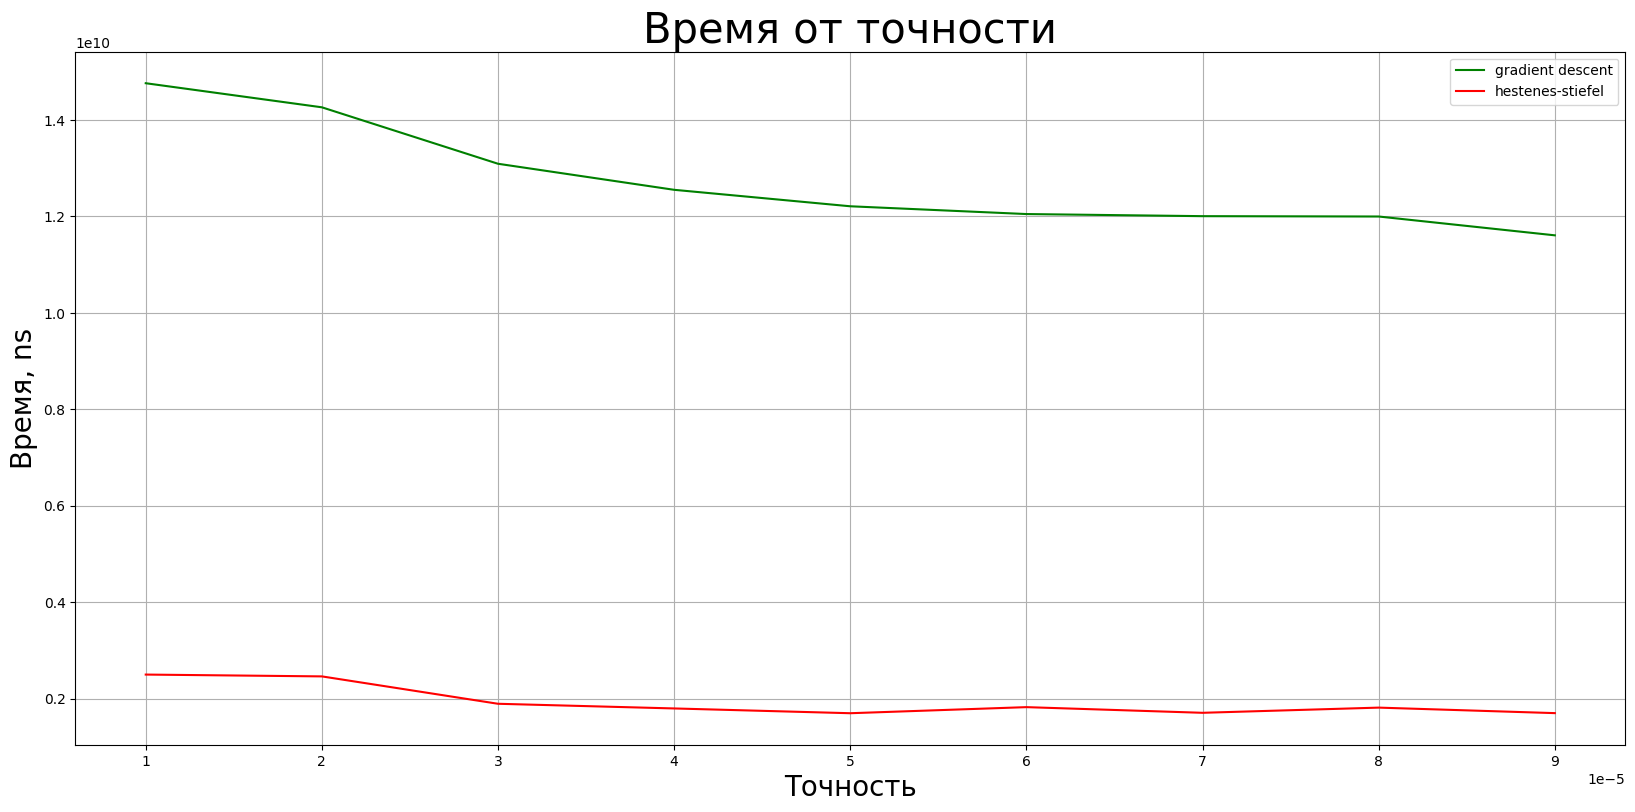

In [15]:
delay_grad = []
delay_hs = []
tolerance = np.arange(0.00001, 0.0001, 0.00001)

n = 10
r = 10
f = second_function(n)
x0 = get_random_point(2 * n, r, np.ones(2 * n))

for tol in tolerance:
    start = time.time_ns()
    result = gradient_descent(f['f'], f['grad'], 2 * n, x0, tol, 0.00000001, 500, "cauchy")
    end = time.time_ns()
    delay_grad.append(end - start)
    
    start = time.time_ns()
    result = hestenes_stiefel(f['f'], f['grad'], 2 * n, x0, tol, 0.00000001, 500, "cauchy")
    end = time.time_ns()
    delay_hs.append(end - start)
    
plt.figure(figsize=(20,9))
plt.title("Время от точности", fontsize=30)
plt.plot(tolerance, delay_grad, c='green')
plt.plot(tolerance, delay_hs, c='red')
plt.xlabel("Точность", fontsize=20)
plt.ylabel("Время, ns", fontsize=20)
plt.legend(["gradient descent", "hestenes-stiefel"])
plt.grid()
plt.show()

<font size="4">Зависимость времени решения от точности одномерного поиска</font>

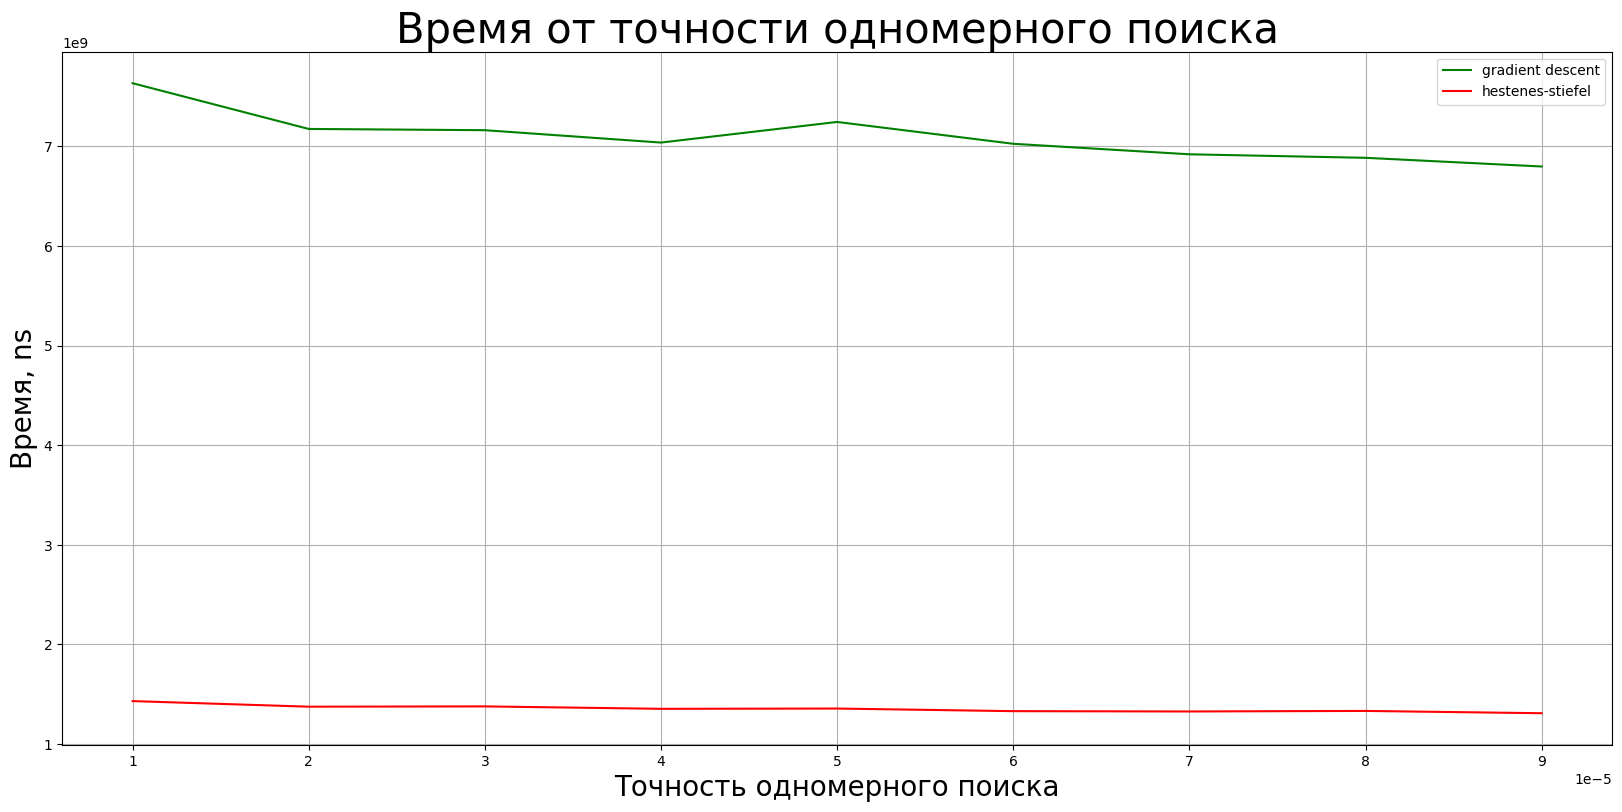

In [16]:
delay_grad = []
delay_hs = []
one_dim_tolerance = np.arange(0.00000001, 0.0000001, 0.00000001)

n = 10
r = 10
f = second_function(n)
x0 = get_random_point(2 * n, r, np.ones(2 * n))

for one_dim_tol in one_dim_tolerance:
    start = time.time_ns()
    result = gradient_descent(f['f'], f['grad'], 2 * n, x0, 0.00001, one_dim_tol, 500, "cauchy")
    end = time.time_ns()
    delay_grad.append(end - start)
    
    start = time.time_ns()
    result = hestenes_stiefel(f['f'], f['grad'], 2 * n, x0, 0.00001, one_dim_tol, 500, "cauchy")
    end = time.time_ns()
    delay_hs.append(end - start)
    
plt.figure(figsize=(20,9))
plt.title("Время от точности одномерного поиска", fontsize=30)
plt.plot(tolerance, delay_grad, c='green')
plt.plot(tolerance, delay_hs, c='red')
plt.xlabel("Точность одномерного поиска", fontsize=20)
plt.ylabel("Время, ns", fontsize=20)
plt.legend(["gradient descent", "hestenes-stiefel"])
plt.grid()
plt.show()

<font size="4">Зависимость времени решения от расстояния между оптимальной и начальной точками</font>

/tmp/ipykernel_7547/284082146.py:35: RuntimeWarning: overflow encountered in exp
  s += np.exp(-alpha * c[i][j] + x[i] + x[n + j])
/tmp/ipykernel_7547/284082146.py:40: RuntimeWarning: overflow encountered in exp
  si += np.exp(-alpha * c[i][j] + x[i] + x[n + j])
/tmp/ipykernel_7547/284082146.py:42: RuntimeWarning: invalid value encountered in double_scalars
  answer[i] += si / s
/tmp/ipykernel_7547/284082146.py:47: RuntimeWarning: overflow encountered in exp
  sj += np.exp(-alpha * c[i][j] + x[i] + x[n + j])
/tmp/ipykernel_7547/284082146.py:49: RuntimeWarning: invalid value encountered in double_scalars
  answer[n + j] += sj / s
/tmp/ipykernel_7547/284082146.py:18: RuntimeWarning: overflow encountered in exp
  s += np.exp(-alpha * c[i][j] + x[i] + x[n + j])


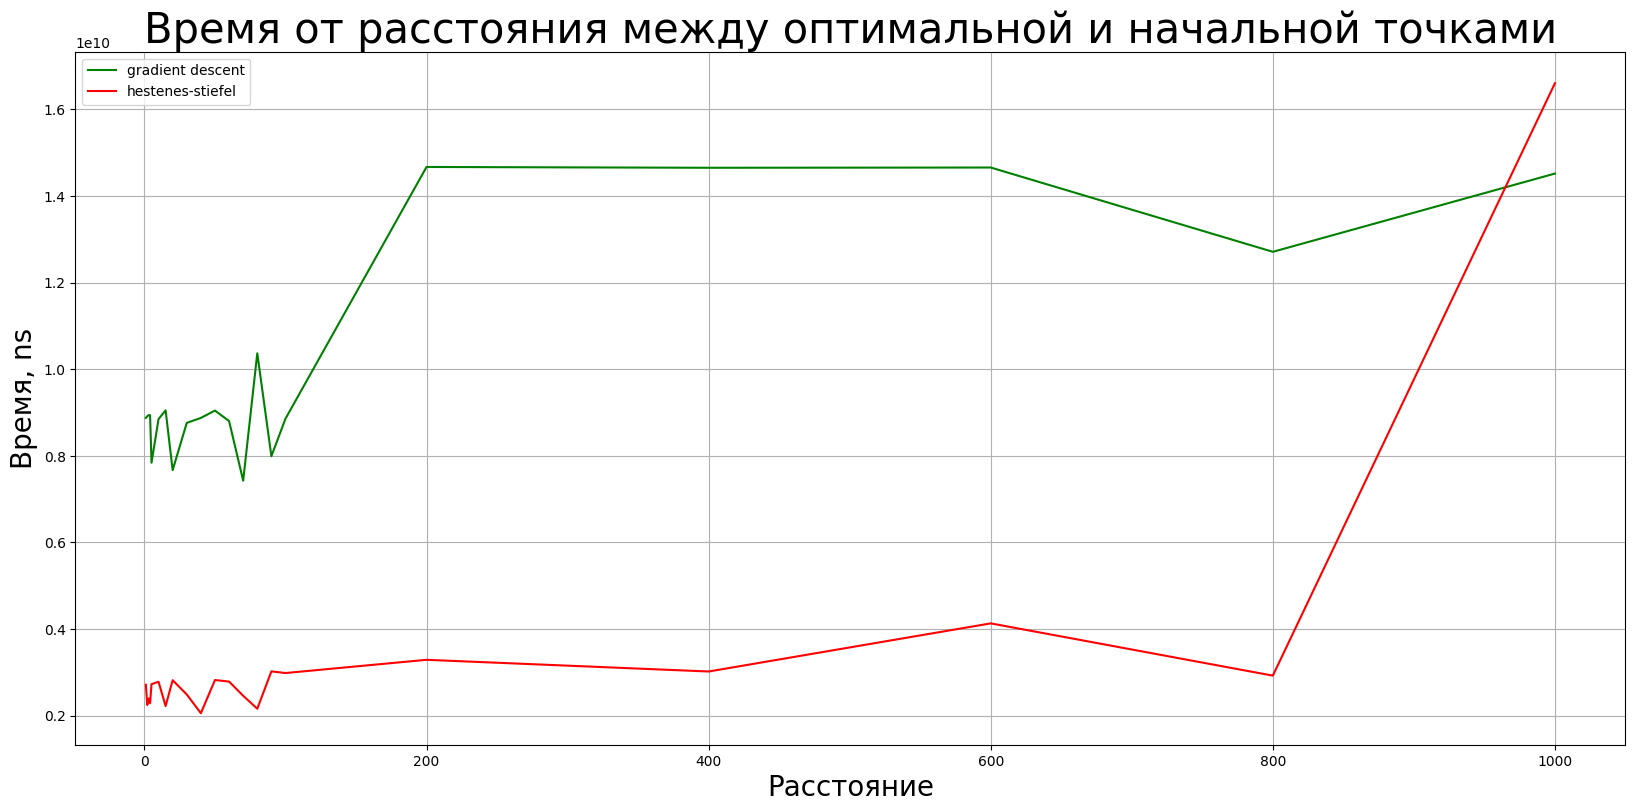

In [19]:
delay_grad = []
delay_hs = []
dists = [1, 2, 3, 4, 5, 10, 15, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 400, 600, 800, 1000]

n = 10
f = second_function(n)

for r in dists:
    x0 = get_random_point(2 * n, r, np.ones(2 * n))
    
    start = time.time_ns()
    result = gradient_descent(f['f'], f['grad'], 2 * n, x0, 0.00001, 0.00000001, 500, "cauchy")
    end = time.time_ns()
    delay_grad.append(end - start)
    
    start = time.time_ns()
    result = hestenes_stiefel(f['f'], f['grad'], 2 * n, x0, 0.00001, 0.00000001, 500, "cauchy")
    end = time.time_ns()
    delay_hs.append(end - start)
    
plt.figure(figsize=(20,9))
plt.title("Время от расстояния между оптимальной и начальной точками", fontsize=30)
plt.plot(dists, delay_grad, c='green')
plt.plot(dists, delay_hs, c='red')
plt.xlabel("Расстояние", fontsize=20)
plt.ylabel("Время, ns", fontsize=20)
plt.legend(["gradient descent", "hestenes-stiefel"])
plt.grid()
plt.show()

### Third task

Rozenbrok function ($x \in R^n, x^* = 1_n, f^* = 0$):

$f(x) = (x_1 - 1)^2 + \alpha \sum_{i = 2}^n (x_i - x_{i-1}^2)^2$

Let $\alpha = 10$

In [20]:
def third_function(n):
    alpha = 10
    
    def f(x):
        nonlocal n, alpha
        
        s = 0
        for i in range(1, n):
            s += (x[i] - x[i - 1] ** 2) ** 2
        
        return (x[0] - 1) ** 2 + alpha * s
    
    def grad(x):
        nonlocal n, alpha
        answer = np.zeros(n)
        
        answer[0] = 2 * (x[0] - 1) - 4 * alpha * (x[1] - x[0] ** 2) * x[0]
        answer[n - 1] = -2 * alpha * (x[n - 1] - x[n - 2] ** 2)
        
        for i in range(1, n - 1):
            answer[i] = -4 * alpha * (x[i + 1] - x[i] ** 2) * x[i] - 2 * alpha * (x[i] - x[i - 1] ** 2)
            
        return answer.T
    
    return {
            'f': f,
            'grad': grad
           }

Just works...

In [22]:
print(gradient_descent(third_function(2)['f'], third_function(2)['grad'], 2, np.ones(2), 0.00001, 0.00000001, 100, "cauchy")['point'])
print(hestenes_stiefel(third_function(2)['f'], third_function(2)['grad'], 2, np.ones(2), 0.00001, 0.00000001, 100, "cauchy")['point'])

print(gradient_descent(third_function(2)['f'], third_function(2)['grad'], 2, 5 * np.ones(2), 0.00001, 0.00000001, 100, "cauchy")['point'])
print(hestenes_stiefel(third_function(2)['f'], third_function(2)['grad'], 2, 5 * np.ones(2), 0.00001, 0.00000001, 100, "cauchy")['point'])

[1. 1.]
[1. 1.]
[-4.14977135 17.30203325]
[  142.37004075 20367.18128197]


<font size="4">Зависимость времени решения от размерности задачи</font>

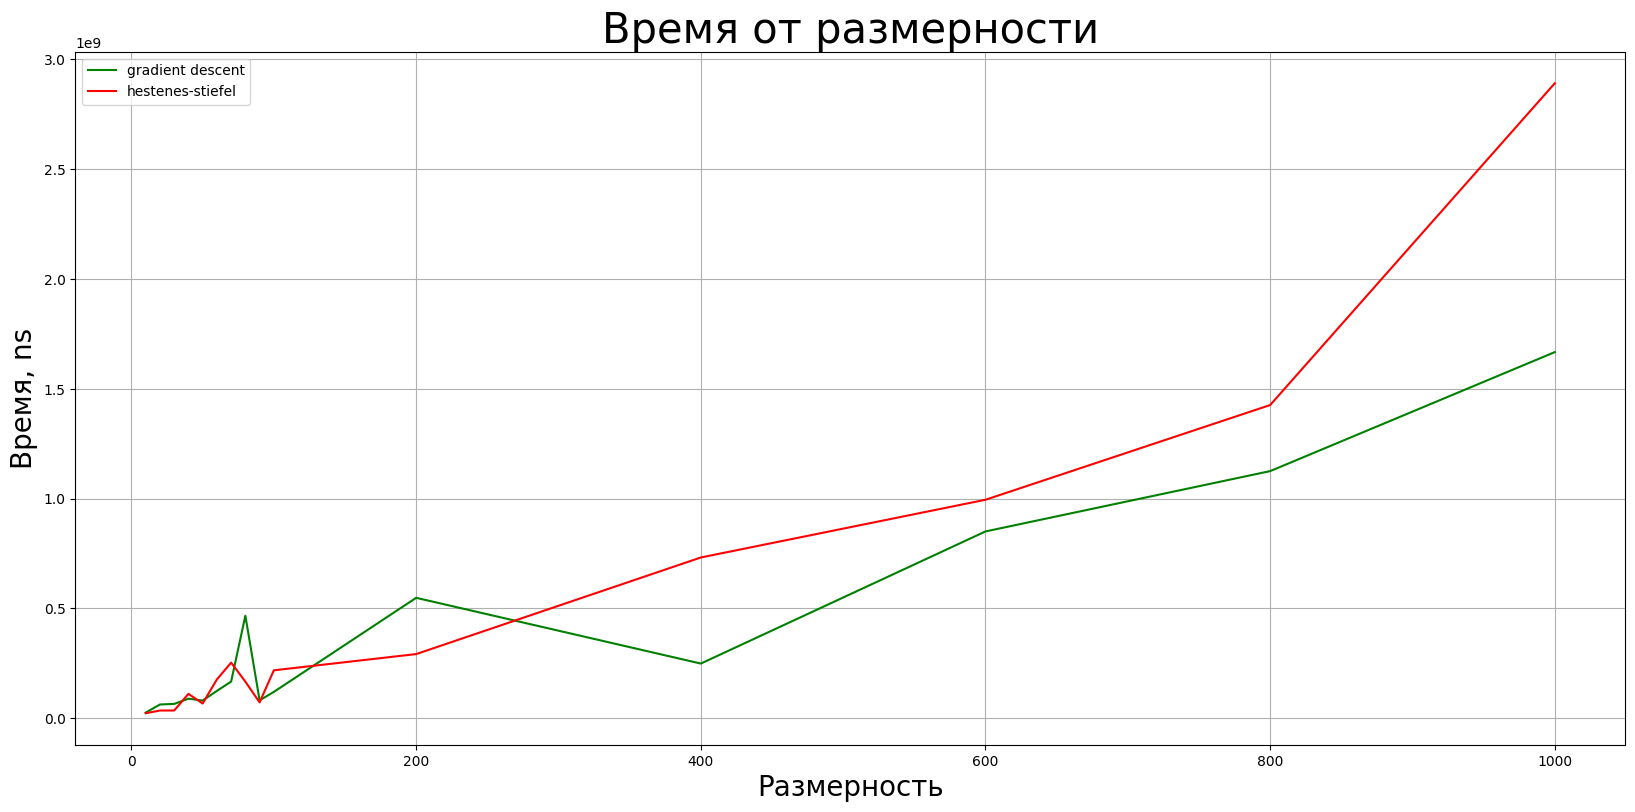

In [23]:
delay_grad = []
delay_hs = []
dimensions = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 400, 600, 800, 1000]
r = 10

for n in dimensions:
    f = third_function(n)
    x0 = get_random_point(n, r, np.ones(n))
    
    start = time.time_ns()
    result = gradient_descent(f['f'], f['grad'], n, x0, 0.00001, 0.00000001, 500, "cauchy")
    end = time.time_ns()
    delay_grad.append(end - start)
    
    start = time.time_ns()
    result = hestenes_stiefel(f['f'], f['grad'], n, x0, 0.00001, 0.00000001, 500, "cauchy")
    end = time.time_ns()
    delay_hs.append(end - start)
    
plt.figure(figsize=(20,9))
plt.title("Время от размерности", fontsize=30)
plt.plot(dimensions, delay_grad, c='green')
plt.plot(dimensions, delay_hs, c='red')
plt.xlabel("Размерность", fontsize=20)
plt.ylabel("Время, ns", fontsize=20)
plt.legend(["gradient descent", "hestenes-stiefel"])
plt.grid()
plt.show()

<font size="4">Зависимость времени решения от требуемой точности</font>

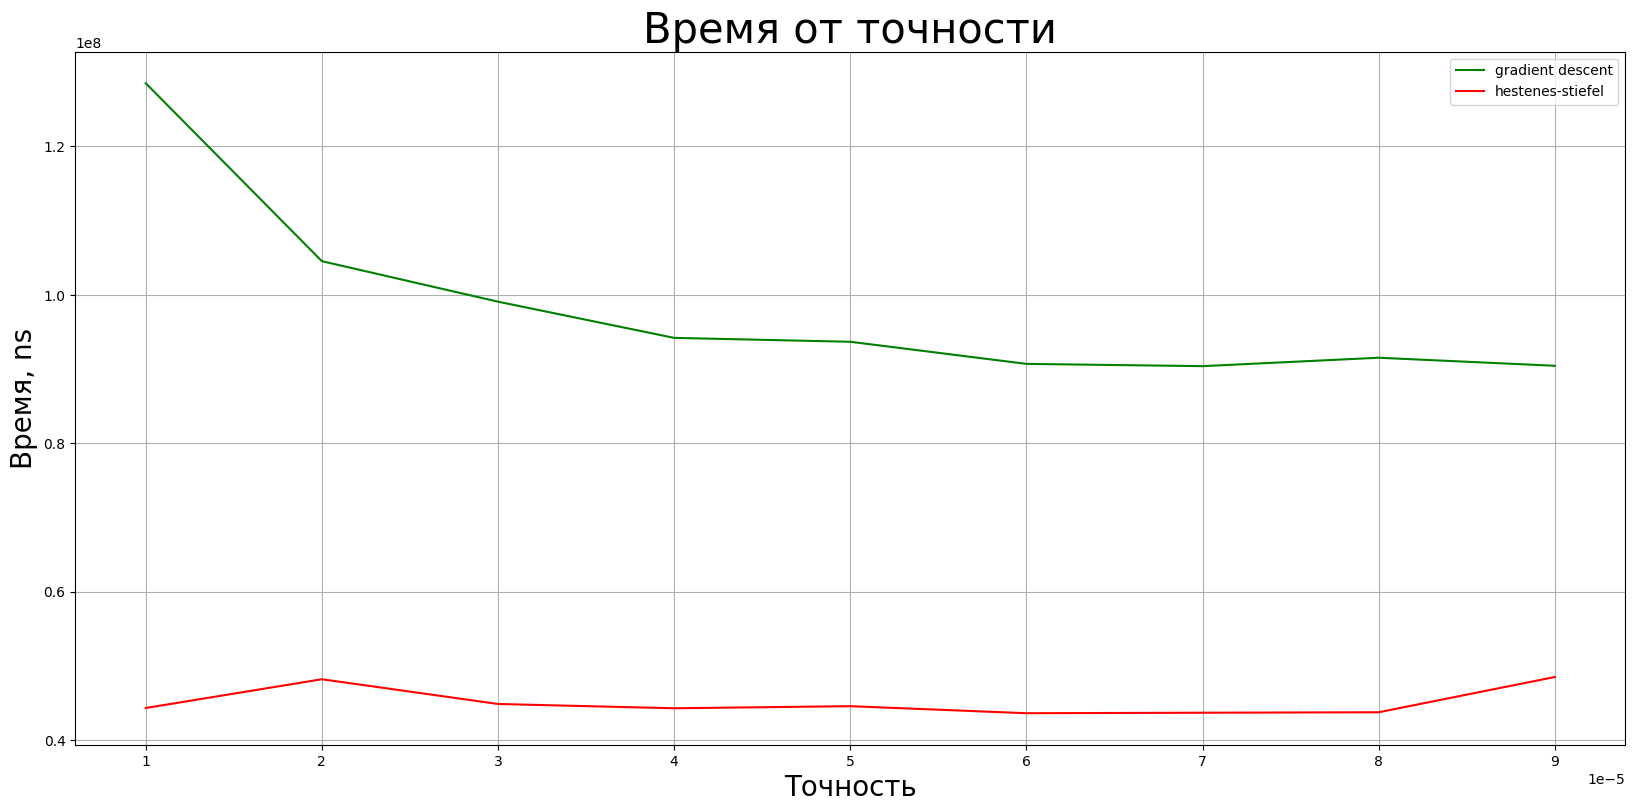

In [24]:
delay_grad = []
delay_hs = []
tolerance = np.arange(0.00001, 0.0001, 0.00001)

n = 10
r = 10
f = third_function(n)
x0 = get_random_point(n, r, np.ones(n))

for tol in tolerance:
    start = time.time_ns()
    result = gradient_descent(f['f'], f['grad'], n, x0, tol, 0.00000001, 500, "cauchy")
    end = time.time_ns()
    delay_grad.append(end - start)
    
    start = time.time_ns()
    result = hestenes_stiefel(f['f'], f['grad'], n, x0, tol, 0.00000001, 500, "cauchy")
    end = time.time_ns()
    delay_hs.append(end - start)
    
plt.figure(figsize=(20,9))
plt.title("Время от точности", fontsize=30)
plt.plot(tolerance, delay_grad, c='green')
plt.plot(tolerance, delay_hs, c='red')
plt.xlabel("Точность", fontsize=20)
plt.ylabel("Время, ns", fontsize=20)
plt.legend(["gradient descent", "hestenes-stiefel"])
plt.grid()
plt.show()

<font size="4">Зависимость времени решения от точности одномерного поиска</font>

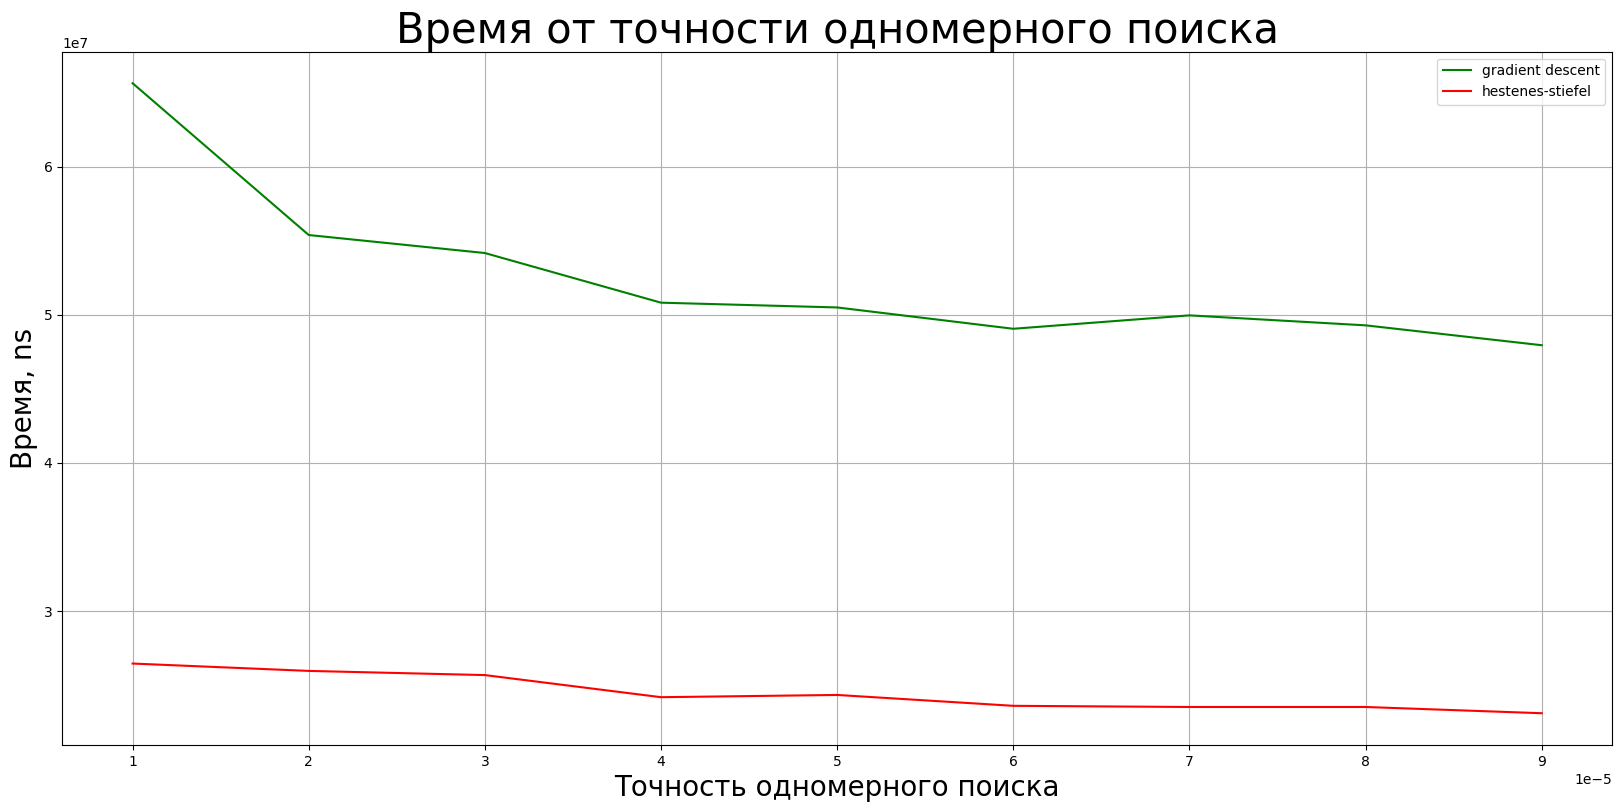

In [25]:
delay_grad = []
delay_hs = []
one_dim_tolerance = np.arange(0.00000001, 0.0000001, 0.00000001)

n = 10
r = 10
f = third_function(n)
x0 = get_random_point(n, r, np.ones(n))

for one_dim_tol in one_dim_tolerance:
    start = time.time_ns()
    result = gradient_descent(f['f'], f['grad'], n, x0, 0.00001, one_dim_tol, 500, "cauchy")
    end = time.time_ns()
    delay_grad.append(end - start)
    
    start = time.time_ns()
    result = hestenes_stiefel(f['f'], f['grad'], n, x0, 0.00001, one_dim_tol, 500, "cauchy")
    end = time.time_ns()
    delay_hs.append(end - start)
    
plt.figure(figsize=(20,9))
plt.title("Время от точности одномерного поиска", fontsize=30)
plt.plot(tolerance, delay_grad, c='green')
plt.plot(tolerance, delay_hs, c='red')
plt.xlabel("Точность одномерного поиска", fontsize=20)
plt.ylabel("Время, ns", fontsize=20)
plt.legend(["gradient descent", "hestenes-stiefel"])
plt.grid()
plt.show()

<font size="4">Зависимость времени решения от расстояния между оптимальной и начальной точками</font>

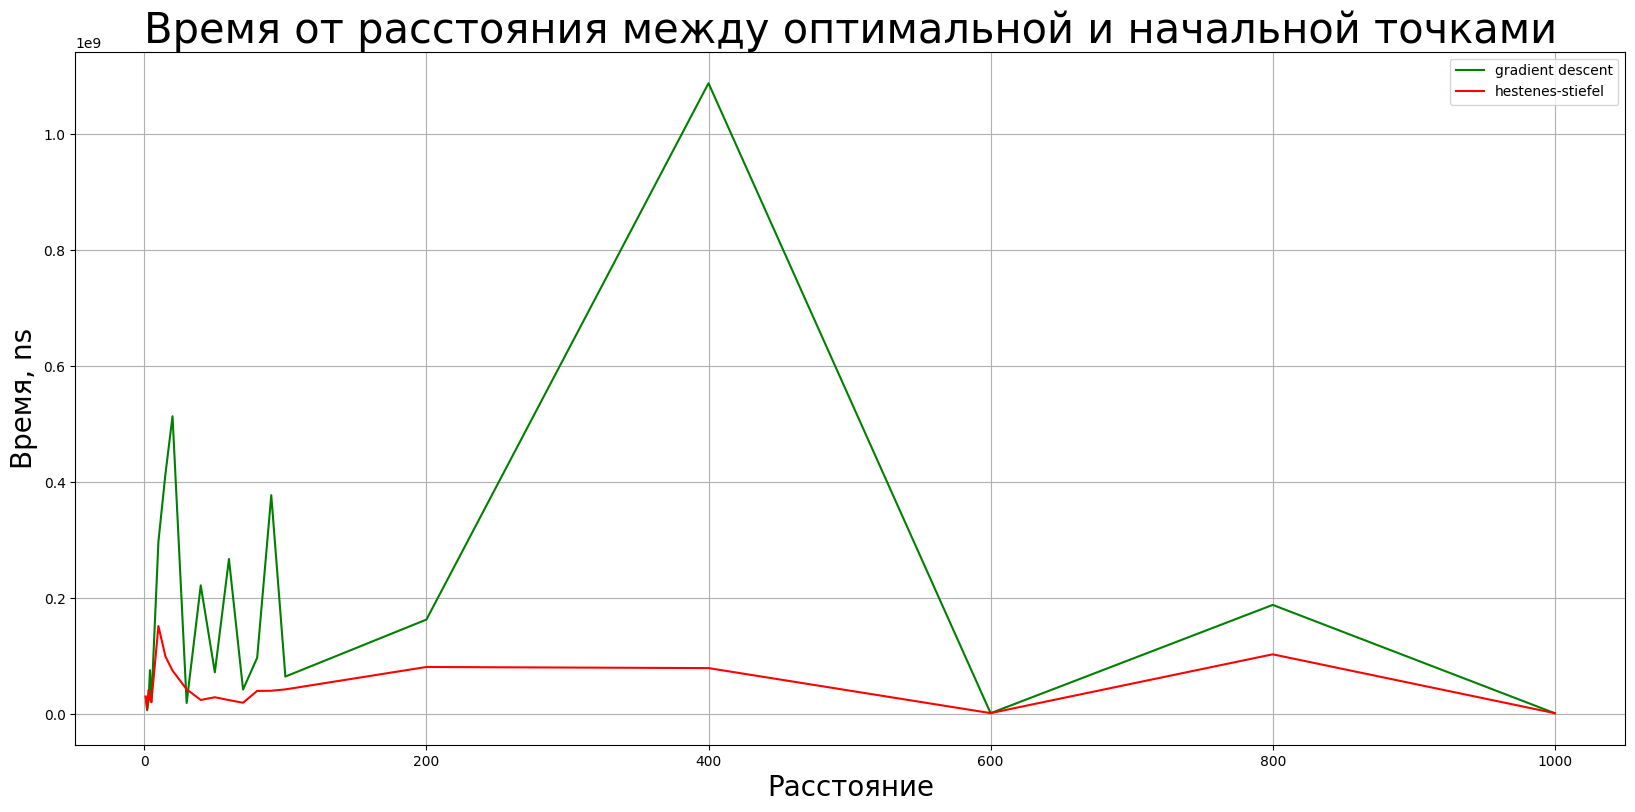

In [26]:
delay_grad = []
delay_hs = []
dists = [1, 2, 3, 4, 5, 10, 15, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 400, 600, 800, 1000]

n = 10
f = third_function(n)

for r in dists:
    x0 = get_random_point(n, r, np.ones(n))
    
    start = time.time_ns()
    result = gradient_descent(f['f'], f['grad'], n, x0, 0.00001, 0.00000001, 500, "cauchy")
    end = time.time_ns()
    delay_grad.append(end - start)
    
    start = time.time_ns()
    result = hestenes_stiefel(f['f'], f['grad'], n, x0, 0.00001, 0.00000001, 500, "cauchy")
    end = time.time_ns()
    delay_hs.append(end - start)
    
plt.figure(figsize=(20,9))
plt.title("Время от расстояния между оптимальной и начальной точками", fontsize=30)
plt.plot(dists, delay_grad, c='green')
plt.plot(dists, delay_hs, c='red')
plt.xlabel("Расстояние", fontsize=20)
plt.ylabel("Время, ns", fontsize=20)
plt.legend(["gradient descent", "hestenes-stiefel"])
plt.grid()
plt.show()